### aim: 

### date: 

In [200]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [201]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [202]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'monospace',
'weight' : 'normal',
'size'   : 12}
plt.rcParams['font.monospace'] = ['Terminal']   
plt.rc('font', **font)

# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd
# from matplotlib import rcParams
# rcParams['font.sans-serif'] = ['Gill Sans']
# rcParams['font.monospace'] = ['Menlo']   
# rcParams['axes.linewidth'] = 1 # calendar border

# ffamily = 'sans-serif'
# rcParams['font.family'] = 'font.monospace'


timeseries

- [ ]  pco2, co2 flux, ppt, tchl, export - by region
- [ ]  amoc, salt, t

maps

- [ ]  pco2, co2flux, ppt, tchl, export

Text(0.5, 0.98, 'colours assigned')

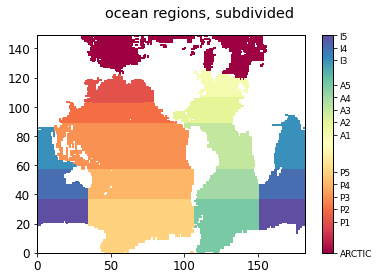

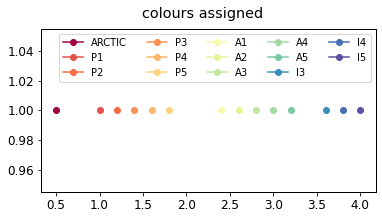

In [203]:
regs = ['ARCTIC', 'P1', 'P2', 'P3', 'P4', 'P5', 'A1', 'A2', 'A3', 'A4', 'A5', 'I3', 'I4', 'I5']

regdict = {'ARCTIC' : {'number' : 0.5},
           'P1' : {'number': 1.0},
          'P2' : {'number': 1.2},
           'P3' : {'number': 1.4},
           'P4' : {'number': 1.6},
           'P5' : {'number': 1.8},
            'A1' : {'number': 2.4},
          'A2' : {'number': 2.6},
           'A3' : {'number': 2.8},
           'A4' : {'number': 3},
           'A5' : {'number': 3.2},
           'I3' : {'number': 3.6},
           'I4' : {'number': 3.8},
           'I5' : {'number': 4},
           
          }
    
tics = []
tcm = 'Spectral'
tmask = nc.Dataset('/gpfs/data/greenocean/software/resources/breakdown/clq_basin_masks_ORCA.nc')

maskno = np.zeros([149,182])
for i in range(0, len(regs)):
    maskno[tmask[regs[i]][:] == 1] = regdict[regs[i]]['number']
    tics.append(regdict[regs[i]]['number'])
maskno[maskno == 0] = np.nan


w = plt.pcolor(maskno, cmap = tcm, vmin = 0.5, vmax = 4)
cbar = plt.colorbar(w, ticks=tics)
t = cbar.ax.set_yticklabels(['ARCTIC', 'P1', 'P2', 'P3', 'P4', 'P5', 'A1', 'A2', 'A3', 'A4', 'A5', 'I3', 'I4', 'I5'], fontsize = 9)
plt.suptitle('ocean regions, subdivided')

fact = 0.2
fig = plt.figure(figsize=(30*fact,15*fact))
import matplotlib
cmap = matplotlib.cm.get_cmap('Spectral')
norm = matplotlib.colors.Normalize(vmin=0.5, vmax=4)
for i in range(0,len(regs)):
    rgba = cmap(norm(regdict[regs[i]]['number']))
    plt.plot(regdict[regs[i]]['number'], 1, marker = 'o', color = rgba, label = regs[i])
    regdict[regs[i]]['colour'] = rgba
plt.legend(ncol = 5, fontsize = 10)
plt.suptitle('colours assigned')

In [204]:
tdir = '/gpfs/data/greenocean/software/runs/regridded/'

In [205]:
RW_ECOa_ = 'TOM12_RW_ECOa-TChl-d0-2018-2022'
RW_ECOa_r = f'{RW_ECOa_}_regrid'
RW_ECOa_f = xr.open_dataset(f'{tdir}{RW_ECOa_}.nc')
RW_ECOa_fr = xr.open_dataset(f'{tdir}{RW_ECOa_r}.nc')
RW_ECOa_fr_TChl = RW_ECOa_fr.TChl.mean(dim = ['time_counter']).isel(deptht=0)
RW_ECOa_fr_TChl = RW_ECOa_fr_TChl.where(RW_ECOa_fr_TChl != 0, np.nan)
lons = RW_ECOa_fr['lon']
lats = RW_ECOa_fr['lat']
####
RW_CO2a_ = 'TOM12_RW_CO2a-TChl-d0-2018-2022'
RW_CO2a_r = f'{RW_CO2a_}_regrid'
RW_CO2a_f = xr.open_dataset(f'{tdir}{RW_CO2a_}.nc')
RW_CO2a_fr = xr.open_dataset(f'{tdir}{RW_CO2a_r}.nc')
RW_CO2a_fr_TChl = RW_CO2a_fr.TChl.mean(dim = ['time_counter']).isel(deptht=0)
RW_CO2a_fr_TChl = RW_CO2a_fr_TChl.where(RW_CO2a_fr_TChl != 0, np.nan)
####

TJ_EA02_ = 'TOM12_TJ_EA02-TChl-d0-2018-2022'
TJ_EA02_r = f'{TJ_EA02_}_regrid'
TJ_EA02_f = xr.open_dataset(f'{tdir}{TJ_EA02_}.nc')
TJ_EA02_fr = xr.open_dataset(f'{tdir}{TJ_EA02_r}.nc')
TJ_EA02_fr_TChl = TJ_EA02_fr.TChl.mean(dim = ['time_counter']).isel(deptht=0)
TJ_EA02_fr_TChl = TJ_EA02_fr_TChl.where(TJ_EA02_fr_TChl != 0, np.nan)

TJ_CA02_ = 'TOM12_TJ_CA02-TChl-d0-2018-2022'
TJ_CA02_r = f'{TJ_CA02_}_regrid'
TJ_CA02_f = xr.open_dataset(f'{tdir}{TJ_CA02_}.nc')
TJ_CA02_fr = xr.open_dataset(f'{tdir}{TJ_CA02_r}.nc')
TJ_CA02_fr_TChl = TJ_CA02_fr.TChl.mean(dim = ['time_counter']).isel(deptht=0)
TJ_CA02_fr_TChl = TJ_CA02_fr_TChl.where(TJ_EA02_fr_TChl != 0, np.nan)
                                    

In [206]:
RW_ECOa_ = 'TOM12_RW_ECOa-EXP-d10-2018-2022'
RW_ECOa_r = f'{RW_ECOa_}_regrid'
RW_ECOa_f = xr.open_dataset(f'{tdir}{RW_ECOa_}.nc')
RW_ECOa_fr = xr.open_dataset(f'{tdir}{RW_ECOa_r}.nc')
RW_ECOa_fr_EXP = RW_ECOa_fr.EXP.mean(dim = ['time_counter']).isel(deptht=0)
RW_ECOa_fr_EXP = RW_ECOa_fr_EXP.where(RW_ECOa_fr_EXP != 0, np.nan)
lons = RW_ECOa_fr['lon']
lats = RW_ECOa_fr['lat']
####
RW_CO2a_ = 'TOM12_RW_CO2a-EXP-d10-2018-2022'
RW_CO2a_r = f'{RW_CO2a_}_regrid'
RW_CO2a_f = xr.open_dataset(f'{tdir}{RW_CO2a_}.nc')
RW_CO2a_fr = xr.open_dataset(f'{tdir}{RW_CO2a_r}.nc')
RW_CO2a_fr_EXP = RW_CO2a_fr.EXP.mean(dim = ['time_counter']).isel(deptht=0)
RW_CO2a_fr_EXP = RW_CO2a_fr_EXP.where(RW_CO2a_fr_EXP != 0, np.nan)
####

TJ_EA02_ = 'TOM12_TJ_EA02-EXP-d10-2018-2022'
TJ_EA02_r = f'{TJ_EA02_}_regrid'
TJ_EA02_f = xr.open_dataset(f'{tdir}{TJ_EA02_}.nc')
TJ_EA02_fr = xr.open_dataset(f'{tdir}{TJ_EA02_r}.nc')
TJ_EA02_fr_EXP = TJ_EA02_fr.EXP.mean(dim = ['time_counter']).isel(deptht=0)
TJ_EA02_fr_EXP = TJ_EA02_fr_EXP.where(TJ_EA02_fr_EXP != 0, np.nan)

TJ_CA02_ = 'TOM12_TJ_CA02-EXP-d10-2018-2022'
TJ_CA02_r = f'{TJ_CA02_}_regrid'
TJ_CA02_f = xr.open_dataset(f'{tdir}{TJ_CA02_}.nc')
TJ_CA02_fr = xr.open_dataset(f'{tdir}{TJ_CA02_r}.nc')
TJ_CA02_fr_EXP = TJ_CA02_fr.EXP.mean(dim = ['time_counter']).isel(deptht=0)
TJ_CA02_fr_EXP = TJ_CA02_fr_EXP.where(TJ_EA02_fr_EXP != 0, np.nan)
                                    

In [207]:
RW_ECOa_ = 'TOM12_RW_ECOa-mldr10_1-d0-2018-2022'
RW_ECOa_r = f'{RW_ECOa_}_regrid'
RW_ECOa_f = xr.open_dataset(f'{tdir}{RW_ECOa_}.nc')
RW_ECOa_fr = xr.open_dataset(f'{tdir}{RW_ECOa_r}.nc')
RW_ECOa_fr_mldr10_1 = RW_ECOa_fr.mldr10_1.mean(dim = ['time_counter'])
RW_ECOa_fr_mldr10_1 = RW_ECOa_fr_mldr10_1.where(RW_ECOa_fr_mldr10_1 != 0, np.nan)
lons = RW_ECOa_fr['lon']
lats = RW_ECOa_fr['lat']
####
RW_CO2a_ = 'TOM12_RW_CO2a-mldr10_1-d0-2018-2022'
RW_CO2a_r = f'{RW_CO2a_}_regrid'
RW_CO2a_f = xr.open_dataset(f'{tdir}{RW_CO2a_}.nc')
RW_CO2a_fr = xr.open_dataset(f'{tdir}{RW_CO2a_r}.nc')
RW_CO2a_fr_mldr10_1 = RW_CO2a_fr.mldr10_1.mean(dim = ['time_counter'])
RW_CO2a_fr_mldr10_1 = RW_CO2a_fr_mldr10_1.where(RW_CO2a_fr_mldr10_1 != 0, np.nan)
####

TJ_EA02_ = 'TOM12_TJ_EA02-mldr10_1-d0-2018-2022'
TJ_EA02_r = f'{TJ_EA02_}_regrid'
TJ_EA02_f = xr.open_dataset(f'{tdir}{TJ_EA02_}.nc')
TJ_EA02_fr = xr.open_dataset(f'{tdir}{TJ_EA02_r}.nc')
TJ_EA02_fr_mldr10_1 = TJ_EA02_fr.mldr10_1.mean(dim = ['time_counter'])
TJ_EA02_fr_mldr10_1 = TJ_EA02_fr_mldr10_1.where(TJ_EA02_fr_mldr10_1 != 0, np.nan)

TJ_CA02_ = 'TOM12_TJ_CA02-mldr10_1-d0-2018-2022'
TJ_CA02_r = f'{TJ_CA02_}_regrid'
TJ_CA02_f = xr.open_dataset(f'{tdir}{TJ_CA02_}.nc')
TJ_CA02_fr = xr.open_dataset(f'{tdir}{TJ_CA02_r}.nc')
TJ_CA02_fr_mldr10_1 = TJ_CA02_fr.mldr10_1.mean(dim = ['time_counter'])
TJ_CA02_fr_mldr10_1 = TJ_CA02_fr_mldr10_1.where(TJ_EA02_fr_mldr10_1 != 0, np.nan)
                                    

In [208]:
RW_ECOa_ = 'TOM12_RW_ECOa-vosaline-d0-2018-2022'
RW_ECOa_r = f'{RW_ECOa_}_regrid'
RW_ECOa_f = xr.open_dataset(f'{tdir}{RW_ECOa_}.nc')
RW_ECOa_fr = xr.open_dataset(f'{tdir}{RW_ECOa_r}.nc')
RW_ECOa_fr_vosaline = RW_ECOa_fr.vosaline.mean(dim = ['time_counter']).isel(deptht=0)
RW_ECOa_fr_vosaline = RW_ECOa_fr_vosaline.where(RW_ECOa_fr_vosaline != 0, np.nan)
lons = RW_ECOa_fr['lon']
lats = RW_ECOa_fr['lat']
####
RW_CO2a_ = 'TOM12_RW_CO2a-vosaline-d0-2018-2022'
RW_CO2a_r = f'{RW_CO2a_}_regrid'
RW_CO2a_f = xr.open_dataset(f'{tdir}{RW_CO2a_}.nc')
RW_CO2a_fr = xr.open_dataset(f'{tdir}{RW_CO2a_r}.nc')
RW_CO2a_fr_vosaline = RW_CO2a_fr.vosaline.mean(dim = ['time_counter']).isel(deptht=0)
RW_CO2a_fr_vosaline = RW_CO2a_fr_vosaline.where(RW_CO2a_fr_vosaline != 0, np.nan)
####

TJ_EA02_ = 'TOM12_TJ_EA02-vosaline-d0-2018-2022'
TJ_EA02_r = f'{TJ_EA02_}_regrid'
TJ_EA02_f = xr.open_dataset(f'{tdir}{TJ_EA02_}.nc')
TJ_EA02_fr = xr.open_dataset(f'{tdir}{TJ_EA02_r}.nc')
TJ_EA02_fr_vosaline = TJ_EA02_fr.vosaline.mean(dim = ['time_counter']).isel(deptht=0)
TJ_EA02_fr_vosaline = TJ_EA02_fr_vosaline.where(TJ_EA02_fr_vosaline != 0, np.nan)

TJ_CA02_ = 'TOM12_TJ_CA02-vosaline-d0-2018-2022'
TJ_CA02_r = f'{TJ_CA02_}_regrid'
TJ_CA02_f = xr.open_dataset(f'{tdir}{TJ_CA02_}.nc')
TJ_CA02_fr = xr.open_dataset(f'{tdir}{TJ_CA02_r}.nc')
TJ_CA02_fr_vosaline = TJ_CA02_fr.vosaline.mean(dim = ['time_counter']).isel(deptht=0)
TJ_CA02_fr_vosaline = TJ_CA02_fr_vosaline.where(TJ_EA02_fr_vosaline != 0, np.nan)
                                    

In [209]:
RW_ECOa_ = 'TOM12_RW_ECOa-Cflx-d10-2018-2022'
RW_ECOa_r = f'{RW_ECOa_}_regrid'
RW_ECOa_f = xr.open_dataset(f'{tdir}{RW_ECOa_}.nc')
RW_ECOa_fr = xr.open_dataset(f'{tdir}{RW_ECOa_r}.nc')
RW_ECOa_fr_Cflx = RW_ECOa_fr.Cflx.mean(dim = ['time_counter'])
RW_ECOa_fr_Cflx = RW_ECOa_fr_Cflx.where(RW_ECOa_fr_Cflx != 0, np.nan)
lons = RW_ECOa_fr['lon']
lats = RW_ECOa_fr['lat']
####
RW_CO2a_ = 'TOM12_RW_CO2a-Cflx-d10-2018-2022'
RW_CO2a_r = f'{RW_CO2a_}_regrid'
RW_CO2a_f = xr.open_dataset(f'{tdir}{RW_CO2a_}.nc')
RW_CO2a_fr = xr.open_dataset(f'{tdir}{RW_CO2a_r}.nc')
RW_CO2a_fr_Cflx = RW_CO2a_fr.Cflx.mean(dim = ['time_counter'])
RW_CO2a_fr_Cflx = RW_CO2a_fr_Cflx.where(RW_CO2a_fr_Cflx != 0, np.nan)
####

TJ_EA02_ = 'TOM12_TJ_EA02-Cflx-d10-2018-2022'
TJ_EA02_r = f'{TJ_EA02_}_regrid'
TJ_EA02_f = xr.open_dataset(f'{tdir}{TJ_EA02_}.nc')
TJ_EA02_fr = xr.open_dataset(f'{tdir}{TJ_EA02_r}.nc')
TJ_EA02_fr_Cflx = TJ_EA02_fr.Cflx.mean(dim = ['time_counter'])
TJ_EA02_fr_Cflx = TJ_EA02_fr_Cflx.where(TJ_EA02_fr_Cflx != 0, np.nan)

TJ_CA02_ = 'TOM12_TJ_CA02-Cflx-d10-2018-2022'
TJ_CA02_r = f'{TJ_CA02_}_regrid'
TJ_CA02_f = xr.open_dataset(f'{tdir}{TJ_CA02_}.nc')
TJ_CA02_fr = xr.open_dataset(f'{tdir}{TJ_CA02_r}.nc')
TJ_CA02_fr_Cflx = TJ_CA02_fr.Cflx.mean(dim = ['time_counter'])
TJ_CA02_fr_Cflx = TJ_CA02_fr_Cflx.where(TJ_EA02_fr_Cflx != 0, np.nan)
                                    

In [210]:
def add_map(lons, lats, tp, tax, vmin = 0, vmax = 1e-5, tit = 'tit', r = 1, c = 2, tcmap = 'Spectral_r'):
    ax1 = fig.add_subplot(r, c, tax, projection=ccrs.Robinson(central_longitude=-50.0), )
    #ax1.add_feature(cfeature.LAND)
    q = ax1.pcolormesh(lons, lats, tp,transform=ccrs.PlateCarree(), 
                       cmap = tcmap, vmin = vmin, vmax = vmax, zorder = 0)
    cbar = fig.colorbar(q, ax = ax1, orientation = 'horizontal', shrink = 0.8, aspect=20, pad=0.042)
    ax1.add_feature(cfeature.LAND, zorder = 1)
    ax1.set_title(tit)


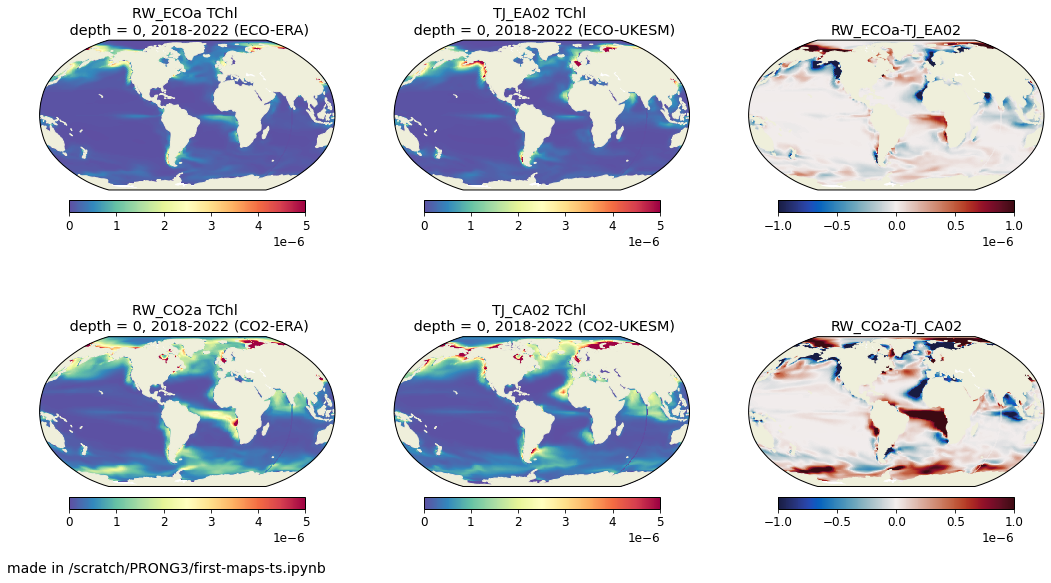

In [211]:
fig = plt.figure(figsize=(18, 10))
fig.text(0.1,0.071,'made in /scratch/PRONG3/first-maps-ts.ipynb', fontsize = 14)
savenam = './figs/TChl_2018-2022clim.jpg'
save = True

tvmin = 0; tvmax = 5e-6
cvmin = -1e-6; cvmax = 1e-6

tit = 'RW_ECOa TChl \n depth = 0, 2018-2022 (ECO-ERA)'
add_map(lons, lats, RW_ECOa_fr_TChl, 1, vmin = tvmin, vmax = tvmax, tit = tit, r = 2, c = 3)
tit = 'TJ_EA02 TChl \n depth = 0, 2018-2022 (ECO-UKESM)'
add_map(lons, lats, TJ_EA02_fr_TChl, 2, vmin = tvmin, vmax = tvmax, tit = tit, r = 2, c = 3)
tit = 'RW_ECOa-TJ_EA02'
add_map(lons, lats, RW_ECOa_fr_TChl-TJ_EA02_fr_TChl, 3, \
        vmin = cvmin, vmax = cvmax, tit = tit,\
        r = 2, c = 3, tcmap = cm.balance)

tit = 'RW_CO2a TChl \n depth = 0, 2018-2022 (CO2-ERA)'
add_map(lons, lats, RW_CO2a_fr_TChl, 4, vmin = tvmin, vmax = tvmax, tit = tit, r = 2, c = 3)
tit = 'TJ_CA02 TChl \n depth = 0, 2018-2022 (CO2-UKESM)'
add_map(lons, lats, TJ_CA02_fr_TChl, 5, vmin = tvmin, vmax = tvmax, tit = tit, r = 2, c = 3)
tit = 'RW_CO2a-TJ_CA02'
add_map(lons, lats, RW_CO2a_fr_TChl-TJ_CA02_fr_TChl, 6, \
        vmin = cvmin, vmax = cvmax, tit = tit,\
        r = 2, c = 3, tcmap = cm.balance)
if save:
    fig.savefig(savenam, bbox_inches='tight', pad_inches=0)



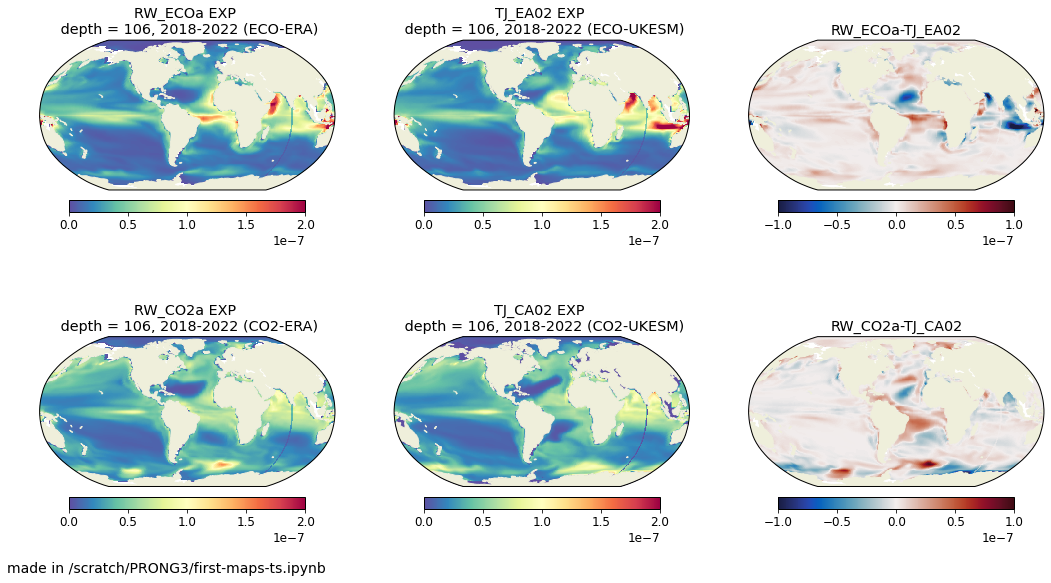

In [212]:
fig = plt.figure(figsize=(18, 10))
fig.text(0.1,0.071,'made in /scratch/PRONG3/first-maps-ts.ipynb', fontsize = 14)
savenam = './figs/EXP_2018-2022clim.jpg'
save = True

tvmin = 0; tvmax = 2e-7
cvmin = -1e-7; cvmax = 1e-7

tit = 'RW_ECOa EXP \n depth = 106, 2018-2022 (ECO-ERA)'
add_map(lons, lats, RW_ECOa_fr_EXP, 1, vmin = tvmin, vmax = tvmax, tit = tit, r = 2, c = 3)
tit = 'TJ_EA02 EXP \n depth = 106, 2018-2022 (ECO-UKESM)'
add_map(lons, lats, TJ_EA02_fr_EXP, 2, vmin = tvmin, vmax = tvmax, tit = tit, r = 2, c = 3)
tit = 'RW_ECOa-TJ_EA02'
add_map(lons, lats, RW_ECOa_fr_EXP-TJ_EA02_fr_EXP, 3, \
        vmin = cvmin, vmax = cvmax, tit = tit,\
        r = 2, c = 3, tcmap = cm.balance)

tit = 'RW_CO2a EXP \n depth = 106, 2018-2022 (CO2-ERA)'
add_map(lons, lats, RW_CO2a_fr_EXP, 4, vmin = tvmin, vmax = tvmax, tit = tit, r = 2, c = 3)
tit = 'TJ_CA02 EXP \n depth = 106, 2018-2022 (CO2-UKESM)'
add_map(lons, lats, TJ_CA02_fr_EXP, 5, vmin = tvmin, vmax = tvmax, tit = tit, r = 2, c = 3)
tit = 'RW_CO2a-TJ_CA02'
add_map(lons, lats, RW_CO2a_fr_EXP-TJ_CA02_fr_EXP, 6, \
        vmin = cvmin, vmax = cvmax, tit = tit,\
        r = 2, c = 3, tcmap = cm.balance)
if save:
    fig.savefig(savenam, bbox_inches='tight', pad_inches=0)



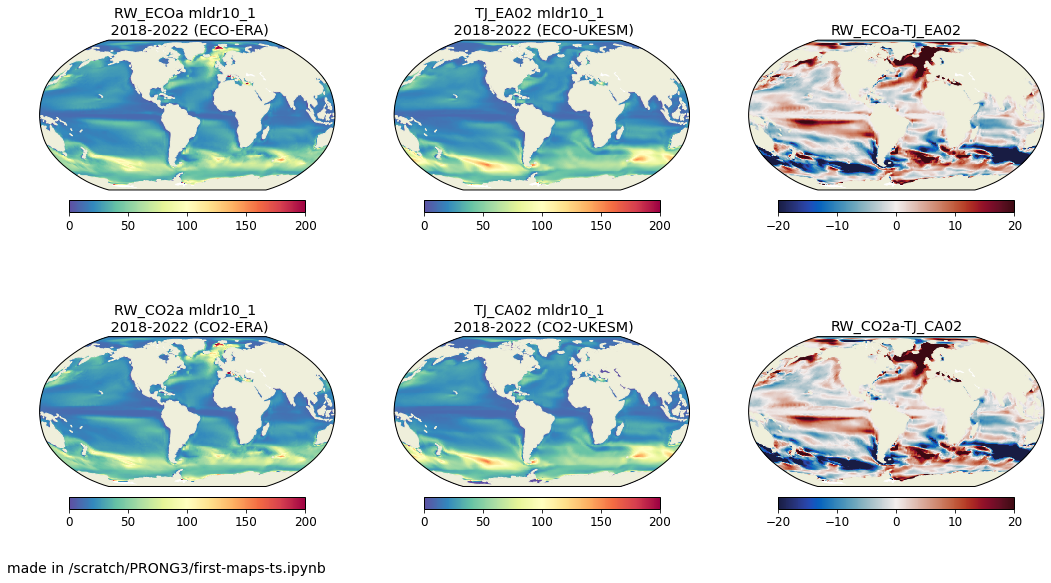

In [213]:
fig = plt.figure(figsize=(18, 10))
fig.text(0.1,0.071,'made in /scratch/PRONG3/first-maps-ts.ipynb', fontsize = 14)
savenam = './figs/mldr10_1_2018-2022clim.jpg'
save = True

tvmin = 0; tvmax = 200
cvmin = -20; cvmax = 20

tit = 'RW_ECOa mldr10_1 \n 2018-2022 (ECO-ERA)'
add_map(lons, lats, RW_ECOa_fr_mldr10_1, 1, vmin = tvmin, vmax = tvmax, tit = tit, r = 2, c = 3)
tit = 'TJ_EA02 mldr10_1 \n 2018-2022 (ECO-UKESM)'
add_map(lons, lats, TJ_EA02_fr_mldr10_1, 2, vmin = tvmin, vmax = tvmax, tit = tit, r = 2, c = 3)
tit = 'RW_ECOa-TJ_EA02'
add_map(lons, lats, RW_ECOa_fr_mldr10_1-TJ_EA02_fr_mldr10_1, 3, \
        vmin = cvmin, vmax = cvmax, tit = tit,\
        r = 2, c = 3, tcmap = cm.balance)

tit = 'RW_CO2a mldr10_1 \n 2018-2022 (CO2-ERA)'
add_map(lons, lats, RW_CO2a_fr_mldr10_1, 4, vmin = tvmin, vmax = tvmax, tit = tit, r = 2, c = 3)
tit = 'TJ_CA02 mldr10_1 \n 2018-2022 (CO2-UKESM)'
add_map(lons, lats, TJ_CA02_fr_mldr10_1, 5, vmin = tvmin, vmax = tvmax, tit = tit, r = 2, c = 3)
tit = 'RW_CO2a-TJ_CA02'
add_map(lons, lats, RW_CO2a_fr_mldr10_1-TJ_CA02_fr_mldr10_1, 6, \
        vmin = cvmin, vmax = cvmax, tit = tit,\
        r = 2, c = 3, tcmap = cm.balance)
if save:
    fig.savefig(savenam, bbox_inches='tight', pad_inches=0)



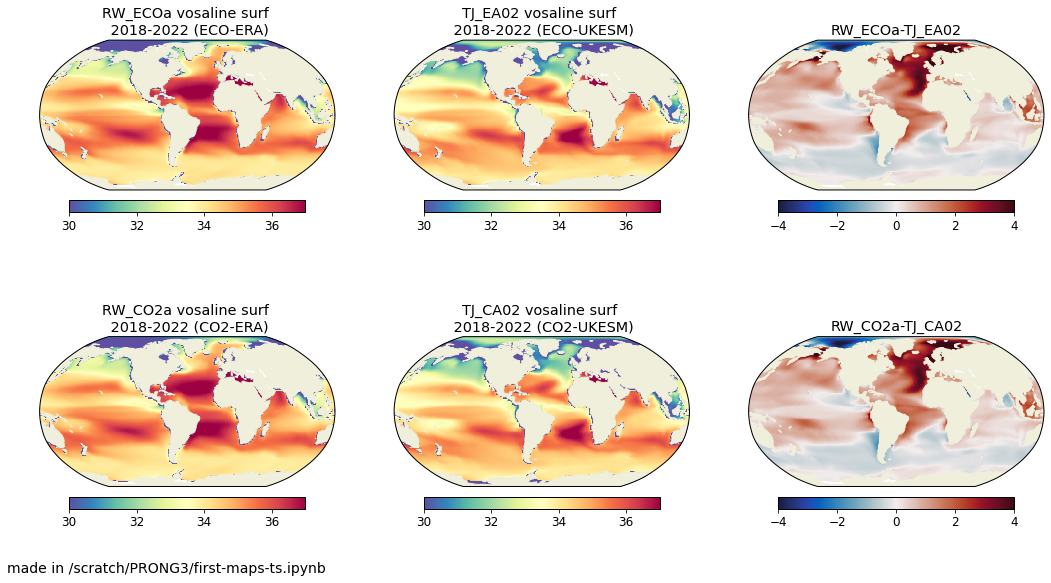

In [214]:
fig = plt.figure(figsize=(18, 10))
fig.text(0.1,0.071,'made in /scratch/PRONG3/first-maps-ts.ipynb', fontsize = 14)
savenam = './figs/vosaline_2018-2022clim.jpg'
save = True

tvmin = 30; tvmax = 37
cvmin = -4; cvmax = 4

tit = 'RW_ECOa vosaline surf \n 2018-2022 (ECO-ERA)'
add_map(lons, lats, RW_ECOa_fr_vosaline, 1, vmin = tvmin, vmax = tvmax, tit = tit, r = 2, c = 3)
tit = 'TJ_EA02 vosaline surf \n 2018-2022 (ECO-UKESM)'
add_map(lons, lats, TJ_EA02_fr_vosaline, 2, vmin = tvmin, vmax = tvmax, tit = tit, r = 2, c = 3)
tit = 'RW_ECOa-TJ_EA02'
add_map(lons, lats, RW_ECOa_fr_vosaline-TJ_EA02_fr_vosaline, 3, \
        vmin = cvmin, vmax = cvmax, tit = tit,\
        r = 2, c = 3, tcmap = cm.balance)

tit = 'RW_CO2a vosaline surf \n 2018-2022 (CO2-ERA)'
add_map(lons, lats, RW_CO2a_fr_vosaline, 4, vmin = tvmin, vmax = tvmax, tit = tit, r = 2, c = 3)
tit = 'TJ_CA02 vosaline surf \n 2018-2022 (CO2-UKESM)'
add_map(lons, lats, TJ_CA02_fr_vosaline, 5, vmin = tvmin, vmax = tvmax, tit = tit, r = 2, c = 3)
tit = 'RW_CO2a-TJ_CA02'
add_map(lons, lats, RW_CO2a_fr_vosaline-TJ_CA02_fr_vosaline, 6, \
        vmin = cvmin, vmax = cvmax, tit = tit,\
        r = 2, c = 3, tcmap = cm.balance)
if save:
    fig.savefig(savenam, bbox_inches='tight', pad_inches=0)



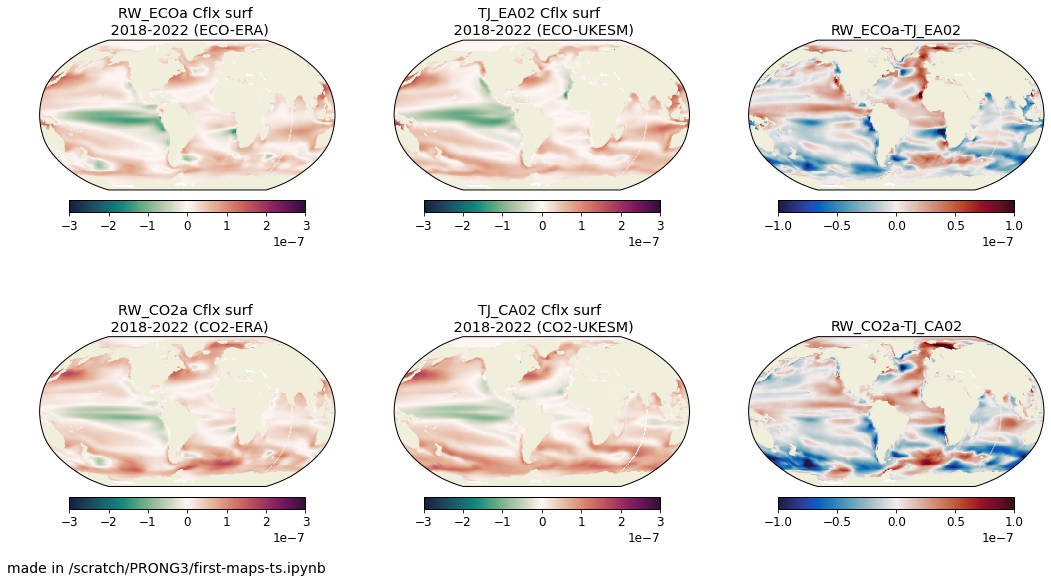

In [215]:
fig = plt.figure(figsize=(18, 10))
fig.text(0.1,0.071,'made in /scratch/PRONG3/first-maps-ts.ipynb', fontsize = 14)
savenam = './figs/Cflx_2018-2022clim.jpg'
save = True

tvmin = -3e-7; tvmax = 3e-7
cvmin = -1e-7; cvmax = 1e-7

tit = 'RW_ECOa Cflx surf \n 2018-2022 (ECO-ERA)'
add_map(lons, lats, RW_ECOa_fr_Cflx, 1, vmin = tvmin, vmax = tvmax, tit = tit, r = 2, c = 3, tcmap = cm.curl)
tit = 'TJ_EA02 Cflx surf \n 2018-2022 (ECO-UKESM)'
add_map(lons, lats, TJ_EA02_fr_Cflx, 2, vmin = tvmin, vmax = tvmax, tit = tit, r = 2, c = 3, tcmap = cm.curl)
tit = 'RW_ECOa-TJ_EA02'
add_map(lons, lats, RW_ECOa_fr_Cflx-TJ_EA02_fr_Cflx, 3, \
        vmin = cvmin, vmax = cvmax, tit = tit,\
        r = 2, c = 3, tcmap = cm.balance)

tit = 'RW_CO2a Cflx surf \n 2018-2022 (CO2-ERA)'
add_map(lons, lats, RW_CO2a_fr_Cflx, 4, vmin = tvmin, vmax = tvmax, tit = tit, r = 2, c = 3, tcmap = cm.curl)
tit = 'TJ_CA02 Cflx surf \n 2018-2022 (CO2-UKESM)'
add_map(lons, lats, TJ_CA02_fr_Cflx, 5, vmin = tvmin, vmax = tvmax, tit = tit, r = 2, c = 3, tcmap = cm.curl)
tit = 'RW_CO2a-TJ_CA02'
add_map(lons, lats, RW_CO2a_fr_Cflx-TJ_CA02_fr_Cflx, 6, \
        vmin = cvmin, vmax = cvmax, tit = tit,\
        r = 2, c = 3, tcmap = cm.balance)
if save:
    fig.savefig(savenam, bbox_inches='tight', pad_inches=0)



In [ ]:
w = xr.open_dataset('')